# Homework Assignment 2
Migaliza Beatrice Lung'ahu


In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
 

from pandas import Series, DataFrame

import sklearn as ski
from sklearn import datasets, linear_model #dataset to load a sample dataset and linear_model to run a linear model
from sklearn.model_selection import train_test_split  #to split and train the data
from sklearn.metrics import mean_squared_error # for finding mean squared error

import seaborn as sns


from sklearn.preprocessing import scale  # 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV #import to carry out the Lasso , Ridge and the cross validation for both
from sklearn.metrics import mean_squared_error

## Time Series Date

In [2]:
fren_cols = ['Date','East_Sidewalk','West_Sidewalk']
fremontBridge_data = pd.read_csv("./Data/FremontBridge.csv", names = fren_cols, skiprows=1)

In [3]:
fremontBridge_data.head()

,Date,East_Sidewalk,West_Sidewalk
0,10/03/2012 12:00:00 AM,4.0,9.0
1,10/03/2012 01:00:00 AM,4.0,6.0
2,10/03/2012 02:00:00 AM,1.0,1.0
3,10/03/2012 03:00:00 AM,2.0,3.0
4,10/03/2012 04:00:00 AM,6.0,1.0


In [4]:
fremontBridge_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54744 entries, 0 to 54743
Data columns (total 3 columns):
Date             54744 non-null object
East_Sidewalk    54735 non-null float64
West_Sidewalk    54735 non-null float64
dtypes: float64(2), object(1)
memory usage: 1.3+ MB


In [5]:
fremontBridge_data.Date = pd.to_datetime(fremontBridge_data.Date)
fremontBridge_data.set_index(fremontBridge_data.Date,inplace=True)

In [6]:
fremontBridge_data.head()

,Date,East_Sidewalk,West_Sidewalk
Date,,,
2012-10-03 00:00:00,2012-10-03 00:00:00,4.0,9.0
2012-10-03 01:00:00,2012-10-03 01:00:00,4.0,6.0
2012-10-03 02:00:00,2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,2012-10-03 03:00:00,2.0,3.0
2012-10-03 04:00:00,2012-10-03 04:00:00,6.0,1.0


### 1. Create a series *Total* that adds the east and west sidewalks

In [7]:
fremontBridge_data['Total'] = fremontBridge_data['East_Sidewalk'] + fremontBridge_data['West_Sidewalk']
fremontBridge_data.head()

,Date,East_Sidewalk,West_Sidewalk,Total
Date,,,,
2012-10-03 00:00:00,2012-10-03 00:00:00,4.0,9.0,13.0
2012-10-03 01:00:00,2012-10-03 01:00:00,4.0,6.0,10.0
2012-10-03 02:00:00,2012-10-03 02:00:00,1.0,1.0,2.0
2012-10-03 03:00:00,2012-10-03 03:00:00,2.0,3.0,5.0
2012-10-03 04:00:00,2012-10-03 04:00:00,6.0,1.0,7.0


### 2. Explore the function ”Dataframe.resample” and plot average bicycle counts for each week,each day, and each month by East, West, and Total


In [8]:
#each day
fremontBridge_Day = fremontBridge_data.resample('D').agg({'East_Sidewalk':'mean','West_Sidewalk':'mean','Total':'mean'})
fremontBridge_Day.head()

,East_Sidewalk,West_Sidewalk,Total
Date,,,
2012-10-03,73.333333,73.375000,146.708333
2012-10-04,71.166667,73.625000,144.791667
2012-10-05,64.916667,66.250000,131.166667
2012-10-06,45.000000,38.583333,83.583333
2012-10-07,49.625000,39.625000,89.250000


In [9]:
#each week
fremontBridge_Week = fremontBridge_data.resample('W').agg({'East_Sidewalk': 'mean','West_Sidewalk': 'mean', 'Total':'mean'})
fremontBridge_Week.head()

,East_Sidewalk,West_Sidewalk,Total
Date,,,
2012-10-07,60.808333,58.291667,119.100000
2012-10-14,51.660714,48.309524,99.970238
2012-10-21,47.297619,45.017857,92.315476
2012-10-28,41.077381,38.904762,79.982143
2012-11-04,38.142857,34.440476,72.583333


In [10]:
#each month
fremontBridge_month = fremontBridge_data.resample('M').agg({'East_Sidewalk':'mean','West_Sidewalk':'mean','Total':'mean'})
fremontBridge_month.head()

,East_Sidewalk,West_Sidewalk,Total
Date,,,
2012-10-31,48.511494,45.877874,94.389368
2012-11-30,36.197222,34.145833,70.343056
2012-12-31,25.010753,23.872312,48.883065
2013-01-31,30.793011,29.534946,60.327957
2013-02-28,38.538690,35.906250,74.444940


### 3. Continue with the daily data. Compute a rolling mean (Dataframe.rolling()) to smooth the data. Which window size do you prefer and why?

I prefer window size 90 days. which is an equivalent of quater year seasonality.
With this choice:

- It does portray that it started from 2012 quarter 3 then shows the trend till end of quarter 4 2019
- A smaller values than 90 would have caused the curives to be too noisy 
- A larger winodw than 90 would cut out the information on the fact that the seasons starts from last quarter of 2012
- The number of East Sidewalk and West Sidewalk increased during the first quarter of the year through to the mid second quarter then it started decreasing. This is a trend that could not be observed if a larger wondow is used or a smaller window would be used

Text(0.5, 0, 'Quarterly')

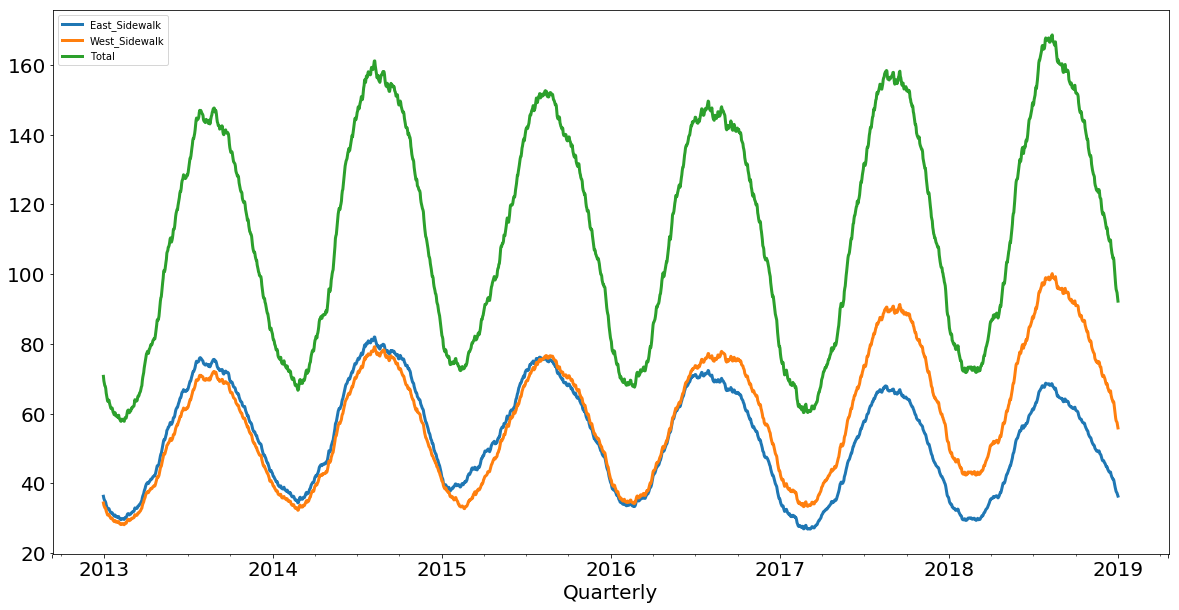

In [11]:
East = fremontBridge_Day[['East_Sidewalk']]
West = fremontBridge_Day[['West_Sidewalk']]
Total = fremontBridge_Day[['Total']]
fremontBridge_Day_rm = pd.concat([East.rolling(90).mean(), West.rolling(90).mean(), Total.rolling(90).mean()],axis = 1) 
fremontBridge_Day_rm.plot(figsize=(20,10),linewidth =3,fontsize= 20)
plt.xlabel('Quarterly',fontsize =20)

### 4. Explore the option win type and choose a different weighting scheme. What does it do?
I used an alternative window of <B>365 <b> days to portray yearly seasonality.
The major differences differences compared to the previous one with the quartely seasonality is that
    
- Their is a clear distinction between the East Sidewalk and the West Side walk. There is a clear difference on the point of interesection and the 
- The time starts from 2014 instead of 2013. It gives the impression that the extension part is for 2013, hides out the fact that it started from 2012



Text(0.5, 0, 'Yearly')

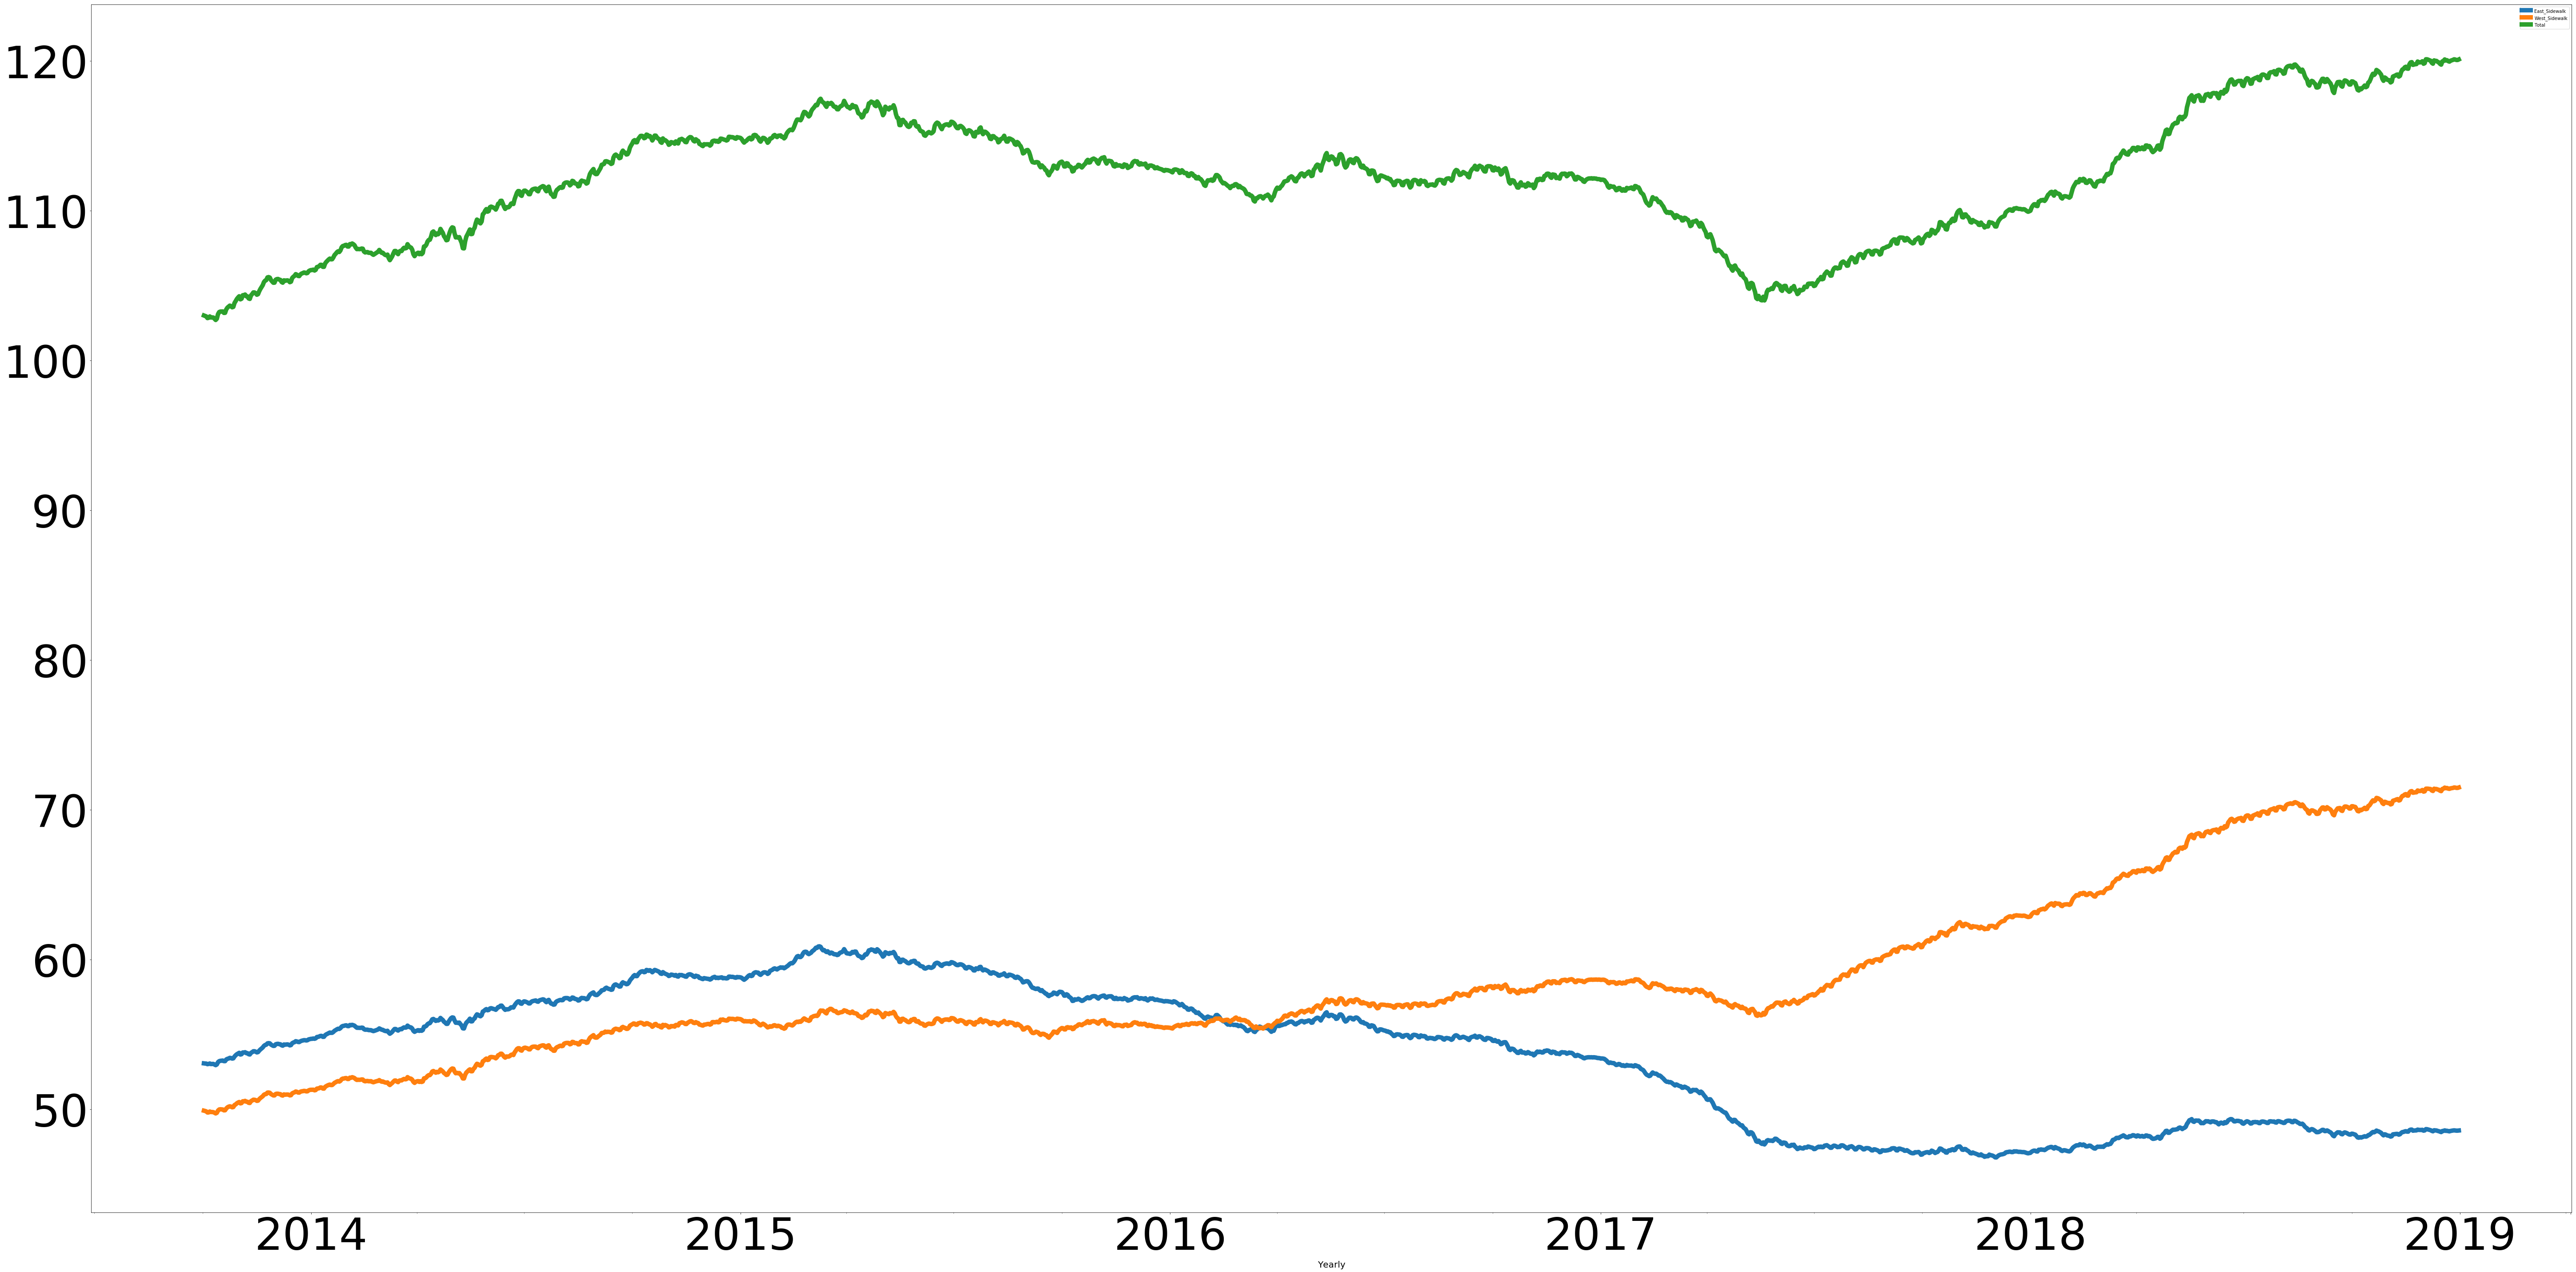

In [12]:
East = fremontBridge_Day[['East_Sidewalk']]
West = fremontBridge_Day[['West_Sidewalk']]
Total = fremontBridge_Day[['Total']]
fremont_rm = pd.concat([East.rolling(365).mean(), West.rolling(365).mean(),Total.rolling(365).mean()], axis = 1)
fremont_rm.plot(figsize=(100,50),linewidth =10,fontsize = 100)
plt.xlabel('Yearly', fontsize=20)

### 5. Use the Dataframe.diff() function to purge the data of potential trends.


### 6.  Are the first-order differences for the East and West Sidewalk correlated with each other?

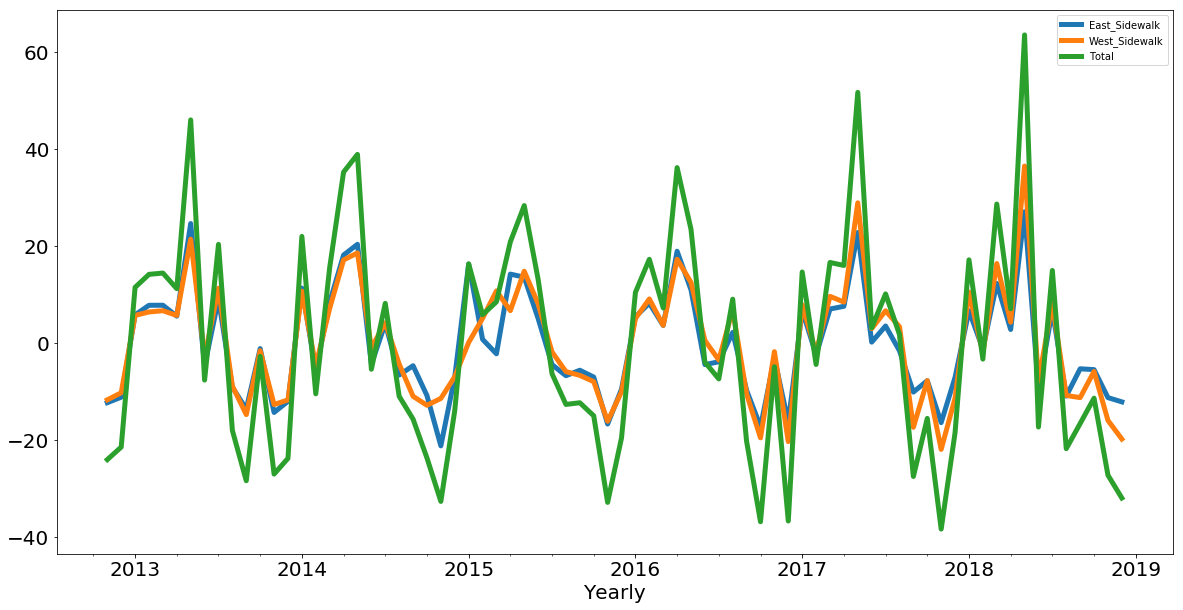

In [13]:
fremontBridge_month.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Yearly', fontsize=20);

It made sense to use the monthly resampled data to find the first order correlation of the East and West sidewalks since the data sums up a bigger chunk of the daily data which whien represented visually does not have so much noise

In [14]:
##code
fremontBridge_month.diff().corr()

,East_Sidewalk,West_Sidewalk,Total
East_Sidewalk,1.000000,0.939153,0.983293
West_Sidewalk,0.939153,1.000000,0.985990
Total,0.983293,0.985990,1.000000


The East and West sidewalks are highly correlated with each other: the correlation is 0.89

### 7. Use Dataframe.plotting.autocorrelation plot() to plot the autocorrelation of the series ”Total”. Briefly interpret the graph.

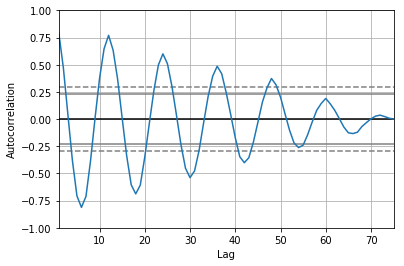

In [15]:
Total_mon = fremontBridge_month['Total']
pd.plotting.autocorrelation_plot(Total_mon);

I used the monthly resampled data to find the autocorrelation. Since the total curve is within the dotted line then this means that the Total sidewalks is significantly correlated with a lag of 12 months

## Modeling

### 1. Explain, in your own words and three short sentences, the difference between supervisedand unsupervised learning

Supervised Learning: data scientist teach the algorithm what conclusion it should make
the algorithms possible outputs are already known

Unsupervised learning: the algorithm learns own its own by looking at the similarities of the inputs and classifies them based on their similarities


### 2. Why is it not a good idea to use a linear regression model to predict survival probabilities in the ”Titanic” data set?

Survival Probabilities in the Titanic dataset cannot be modelled linearly because the feature being measured a categorical data which is either a survival or not. This cannot be well represented on linear regression which takes in a continuous data

### 3.  Use the ”Hitters.csv” data from our previous class and estimate a linear regression model:

- Split the data into a training and a test set.
- Estimate a model with 3 independent variables: ”AtBat”, ”Hits”, and ”HmRun”.
- Estimate a model that additionally includes ”Runs”, ”RBI”, ”Walks”, and ”Years”.
- Evaluate the mean squared error and the R-squared for both models in the test set. Which model do you prefer?


In [16]:
hitters_data = pd.read_csv('./Data/hitters.csv', sep=',')

In [17]:
hitters_data.head()

,Player,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N


#### Split the data into a training and a test set.

In [18]:
#replace the missing salaries with the mean score
hitters_data['Salary'] = hitters_data['Salary'].fillna((hitters_data['Salary'].mean()))

X_1 = hitters_data[['AtBat','Hits','HmRun']]
X_2 =  hitters_data[['AtBat','Hits','HmRun','Runs','RBI','Walks','Years']]


#select target
y = hitters_data.Salary

#divide the data inot test and training dataset by the different X variables
x_train_1,x_test_1,y_train_1,y_test_1 = train_test_split(X_1,y,test_size =0.2) # the train size will be 80% of the data and the test will be 20%

print(x_train_1.shape,y_train_1.shape)
print(x_test_1.shape,y_test_1.shape),

(257, 3) (257,)
(65, 3) (65,)


(None,)

#### Estimate a model with 3 independent variables: ”AtBat”, ”Hits”, and ”HmRun”.

In [19]:
lm = linear_model.LinearRegression()
model_1 = lm.fit(x_train_1,y_train_1)

predictions = lm.predict(x_test_1)
predictions

array([ 679.32604893,  493.36274314,  418.92142866,  444.14125965,
        473.33340151,  410.29084597,  890.43666789,  564.96026624,
        344.86308265,  480.70293502,  728.7760408 ,  642.89198056,
        669.49077729,  775.45504746,  866.8987951 ,  393.68262366,
        520.28406814,  400.40582216,  310.74241349,  470.56114526,
        636.97209778,  805.75153869,  306.7453707 ,  389.27675691,
        599.70829641,  581.85631356,  755.54010419,  783.03075206,
        432.95007627,  752.8480974 ,  470.92317347,  576.94239938,
        930.34877014,  558.28738171,  352.98505612,  736.53950427,
        815.61927387,  448.18889729,  914.6651434 ,  375.6709846 ,
        507.15191344,  506.00441994,  534.0111203 ,  360.25972706,
        493.54473664,  538.13985008,  628.75342891,  355.86706895,
        546.19309737,  483.43977132,  671.16093134,  287.69586129,
        479.50344219,  275.80690534,  734.5372575 ,  536.20140683,
        792.10037509,  450.52520305,  619.78542395,  941.97155

#### Estimate a model that additionally includes ”Runs”, ”RBI”, ”Walks”, and ”Years”.

In [20]:
#split for the second set of data to be trained
x_train_2,x_test_2,y_train_2,y_test_2 = train_test_split(X_2,y, test_size =0.2)
model_2 = lm.fit(x_train_2,y_train_2)

predictions2 = lm.predict(x_test_2)
predictions2


array([ 617.83104557,  145.78934227,  306.36830634,  620.50899112,
        223.15117306,  770.19274264, 1043.22008401,  807.86052681,
        590.98151407,  362.76564602,  761.29550357,  420.40764282,
        622.85828336,  677.34160137,  817.501796  ,  696.55751664,
        792.68635068,  333.86284951,  605.19247793,  559.9342625 ,
        615.60926989,  829.68351354,  854.48932277,  383.6012014 ,
        707.23097896, 1012.6408566 ,  501.08411197,  136.54660638,
        408.8909526 ,  581.92002703,  790.62517672,  293.9956793 ,
        378.19377859,  351.37551472,  907.96264446,  451.71005794,
        495.12700911,  555.46726217,  422.93578422,  747.74129641,
        297.59095442,  659.39484586,  626.83496555,  417.4839242 ,
        684.34808253,  348.04385864,  686.37059286,  992.57529711,
        337.34397048,  531.3475642 ,  963.4623987 ,  349.35083398,
        512.37623989,  207.5599777 ,  874.30715662,  309.9499008 ,
        438.20835521,  455.75228168,  137.46196781,  295.44753

#### Evaluate the mean squared error and the R-squared for both models in the test set. Which model do you prefer?

In [21]:
mse_model_1 = mean_squared_error(y_test_1, predictions)
mse_model_2 = mean_squared_error(y_test_2, predictions2)
print('MSE for model 1 is : ', mse_model_1, 'MSE for model 2 is: ', mse_model_2)

MSE for model 1 is :  135790.91116778043 MSE for model 2 is:  81304.66223388306


The first model that has less variables : AtBat, Hits, HmRun is better than the one with more features added for modelling since it has a lower Mean Square Error 

## *** More complicated Question for extra credit ***
-  Use the users and ratings data from our session on Data Pre-processing
    - http://files.grouplens.org/datasets/movielens/ml-100k/u.user
    - http://files.grouplens.org/datasets/movielens/ml-100k/u.data
-  Use the Lasso to explain ratings by user characteristics.
-  Use Cross-validation to find the best value of λ (i.e., the alpha parameter in the Lasso function from the sklearn package).
-  Can you think of a way how to take care of the fact that some users will generally give higher scores than others?

In [22]:
#read the data from the 
u_cols = ['user_id', 'age', 'gender', 
            'occupation', 'zipcode']

users = pd.read_csv(
    'http://files.grouplens.org/datasets/movielens/ml-100k/u.user', 
    sep='|', names=u_cols, usecols=range(5), encoding = "ISO-8859-1")
users.set_index('user_id', inplace = True) # reset the index to be the user's Id 
users.head()

,age,gender,occupation,zipcode
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213


In [23]:
r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv(
    'http://files.grouplens.org/datasets/movielens/ml-100k/u.data', 
    sep='\t', names=r_cols)
ratings.head()

,user_id,movie_id,rating,unix_timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [24]:
#find the mean of each users ratings from the ratings table
user_rating = ratings.groupby('user_id').mean()
user_rating.head()

,movie_id,rating,unix_timestamp
user_id,,,
1,136.500000,3.610294,8.773916e+08
2,249.500000,3.709677,8.886204e+08
3,318.814815,2.796296,8.892372e+08
4,291.041667,4.333333,8.920028e+08
5,291.291429,2.874286,8.762081e+08


In [25]:
#  the user rating with the users data set by user rating 
df3 = users.join(user_rating)
df3.head()

,age,gender,occupation,zipcode,movie_id,rating,unix_timestamp
user_id,,,,,,,
1,24,M,technician,85711,136.500000,3.610294,8.773916e+08
2,53,F,other,94043,249.500000,3.709677,8.886204e+08
3,23,M,writer,32067,318.814815,2.796296,8.892372e+08
4,24,M,technician,43537,291.041667,4.333333,8.920028e+08
5,33,F,other,15213,291.291429,2.874286,8.762081e+08


In [40]:
rating_r = df3.rating

#describe dummy variable for gender and occupation and zipcode
dummies = pd.get_dummies(df3[['gender','occupation']])

#drop the gender, occupation and zipcode and the rating  then concate the X variable with the dummy variables
X_ = df3.drop(['rating', 'gender', 'occupation', 'zipcode','unix_timestamp','movie_id'], axis = 1).astype('float64')

X_features = pd.concat([X_, dummies[['gender_F','occupation_administrator', 'occupation_artist',
       'occupation_doctor', 'occupation_educator', 'occupation_engineer',
       'occupation_entertainment', 'occupation_executive',
       'occupation_healthcare', 'occupation_homemaker', 'occupation_lawyer',
       'occupation_librarian', 'occupation_marketing', 'occupation_none',
       'occupation_other', 'occupation_programmer', 'occupation_retired',
       'occupation_salesman', 'occupation_scientist', 'occupation_student',
       'occupation_technician']]], axis = 1)
X_features = pd.concat([X_, dummies],axis =1)


### Use the Lasso to explain ratings by user characteristics.

In [41]:
alphas = 10**np.linspace(10,-2,100)*0.05  #define alphas

#split the data set inot training and test data
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_features, rating_r, test_size = 0.2, random_state = 5)

lasso = Lasso(max_iter =100, normalize =True)
coefs = []

for a in alphas:
    lasso.set_params(alpha = a)
    lasso.fit(X_train_r, y_train_r)
    coefs.append(lasso.coef_)    


In [46]:
pd.Series(lasso.coef_,index=X_features.columns)

age                         0.002232
gender_F                    0.000000
gender_M                   -0.000000
occupation_administrator    0.000000
occupation_artist           0.000000
occupation_doctor           0.000000
occupation_educator         0.013585
occupation_engineer         0.031214
occupation_entertainment   -0.014836
occupation_executive       -0.000000
occupation_healthcare      -0.113050
occupation_homemaker       -0.127919
occupation_lawyer          -0.000000
occupation_librarian        0.000000
occupation_marketing       -0.025463
occupation_none            -0.000000
occupation_other           -0.000000
occupation_programmer       0.000000
occupation_retired         -0.006265
occupation_salesman        -0.000000
occupation_scientist        0.000000
occupation_student         -0.000000
occupation_technician       0.000000
occupation_writer          -0.000000
dtype: float64

When using a smaller lambda, the Lasso regression leaves some variables that explain the user characteristics that affect the rating. However it is impossible to tell which alpha will perfectly affect the model hence the need to carry out cross validation.


In [47]:
non_significant_variables

NameError: name 'non_significant_variables' is not defined

-----

#### Use Cross-validation to find the best value of λ (i.e., the alpha parameter in the Lasso function from the sklearn package).

In [29]:
lasso_cv = LassoCV(n_alphas = 100, max_iter=10000, normalize=True, random_state=5, cv = 5)
lasso_cv.fit(X_train_r, y_train_r)
lasso_cv.alpha_

0.0012113330660923965

In [30]:
pd.Series(lasso_cv.coef_,index=X_features.columns)

age                         0.000627
gender_F                   -0.000000
gender_M                    0.000000
occupation_administrator    0.000000
occupation_artist           0.000000
occupation_doctor           0.000000
occupation_educator         0.000000
occupation_engineer         0.000000
occupation_entertainment   -0.000000
occupation_executive       -0.000000
occupation_healthcare      -0.000000
occupation_homemaker       -0.000000
occupation_lawyer          -0.000000
occupation_librarian        0.000000
occupation_marketing       -0.000000
occupation_none            -0.000000
occupation_other           -0.000000
occupation_programmer       0.000000
occupation_retired         -0.000000
occupation_salesman        -0.000000
occupation_scientist        0.000000
occupation_student         -0.000000
occupation_technician       0.000000
occupation_writer          -0.000000
dtype: float64

After Cross validation the only characteristic that affects the user rating is the users age. 

-----


#### Can you think of a way how to take care of the fact that some users will generally give higher scores than others?